In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

In [2]:
print("Đọc dữ liệu từ file CSV...")
df = pd.read_csv("AwA2_processed_full.csv")  # Giả định file nằm cùng thư mục notebook

Đọc dữ liệu từ file CSV...


Tổng quan dữ liệu

In [3]:
print("1. Kích thước dữ liệu:", df.shape)
print("\n2. 5 dòng đầu:")
display(df.head())

print("\n3. Thông tin dữ liệu:")
df.info()

print("\n4. Thống kê mô tả:")
display(df.describe(include='all'))

print("\n5. Kiểu dữ liệu từng cột:")
print(df.dtypes)

1. Kích thước dữ liệu: (37322, 2053)

2. 5 dòng đầu:


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f2043,f2044,f2045,f2046,f2047,label,filename,class_name,class_fullname,split
0,-0.392888,3.493722,0.336179,-0.570688,1.046404,0.625931,-0.326789,-0.489770,-0.641081,-0.069784,...,-0.390617,-0.561891,-0.169599,-0.465814,0.235203,0,antelope_10001.jpg,antelope,antelope,train
1,-0.668500,2.436497,-0.639793,-0.634825,1.112746,2.052809,-0.632268,-0.493884,-0.608876,-0.603358,...,-0.434240,-0.342819,0.266059,-0.505717,-0.108181,0,antelope_10002.jpg,antelope,antelope,train
2,0.163231,0.436661,-0.668206,-0.654104,-0.111441,0.092412,-0.836440,-0.441649,-0.147349,-0.481978,...,-0.761742,-0.637747,1.350432,-0.470118,-0.614212,0,antelope_10003.jpg,antelope,antelope,train
3,-0.414235,0.730631,-0.666131,-0.704741,4.079749,-0.688144,0.460517,-0.073035,-0.534476,-0.591607,...,-0.759829,-0.637747,-0.118752,-0.357169,-0.689378,0,antelope_10004.jpg,antelope,antelope,train
4,-0.072048,-0.490216,-0.576980,-0.704741,2.056847,-0.613751,-0.549711,-0.544086,-0.391745,-0.374936,...,-0.747275,-0.626895,-0.089475,-0.516458,-0.552150,0,antelope_10005.jpg,antelope,antelope,train



3. Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37322 entries, 0 to 37321
Columns: 2053 entries, f0 to split
dtypes: float64(2048), int64(1), object(4)
memory usage: 584.6+ MB

4. Thống kê mô tả:


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f2043,f2044,f2045,f2046,f2047,label,filename,class_name,class_fullname,split
count,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,...,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,3.732200e+04,37322.000000,37322,37322,37322,37322
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,37322,50,50,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,zebra_11170.jpg,horse,horse,train
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1645,1645,30337
mean,-3.595930e-15,-4.575254e-15,-8.620485e-16,2.832880e-15,1.794158e-15,-1.449947e-15,-4.575254e-15,-2.113999e-15,3.893687e-15,-2.768912e-15,...,-1.285458e-15,-3.454286e-15,-1.608345e-15,1.909910e-15,-3.685791e-16,25.472670,NaN,NaN,NaN,NaN
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,14.268285,NaN,NaN,NaN,NaN
min,-6.685005e-01,-9.541530e-01,-6.682058e-01,-7.047409e-01,-6.270947e-01,-7.443346e-01,-8.990476e-01,-5.440861e-01,-6.410814e-01,-6.033579e-01,...,-7.617420e-01,-6.377472e-01,-8.161512e-01,-5.164576e-01,-6.893776e-01,0.000000,NaN,NaN,NaN,NaN
25%,-6.236489e-01,-7.360076e-01,-6.279407e-01,-6.296237e-01,-5.980070e-01,-6.706915e-01,-7.303613e-01,-5.190790e-01,-5.831503e-01,-5.397690e-01,...,-6.777504e-01,-6.042515e-01,-7.253566e-01,-4.808424e-01,-6.313678e-01,14.000000,NaN,NaN,NaN,NaN
50%,-3.878596e-01,-3.073928e-01,-3.954947e-01,-3.904858e-01,-4.210980e-01,-3.940521e-01,-3.356968e-01,-3.743763e-01,-3.735588e-01,-3.324707e-01,...,-3.667040e-01,-4.013011e-01,-3.814227e-01,-3.355656e-01,-3.728787e-01,26.000000,NaN,NaN,NaN,NaN
75%,2.165947e-01,4.197256e-01,2.092164e-01,2.045445e-01,1.468407e-01,2.822995e-01,4.007506e-01,7.069278e-02,1.479281e-01,1.201015e-01,...,3.030780e-01,1.598189e-01,3.724464e-01,2.826968e-02,2.076700e-01,38.000000,NaN,NaN,NaN,NaN



5. Kiểu dữ liệu từng cột:
f0                float64
f1                float64
f2                float64
f3                float64
f4                float64
                   ...   
label               int64
filename           object
class_name         object
class_fullname     object
split              object
Length: 2053, dtype: object


In [4]:
print("\n6. Số lượng giá trị thiếu:")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n7. Dòng bị trùng:", df.duplicated().sum())


6. Số lượng giá trị thiếu:
Series([], dtype: int64)

7. Dòng bị trùng: 0


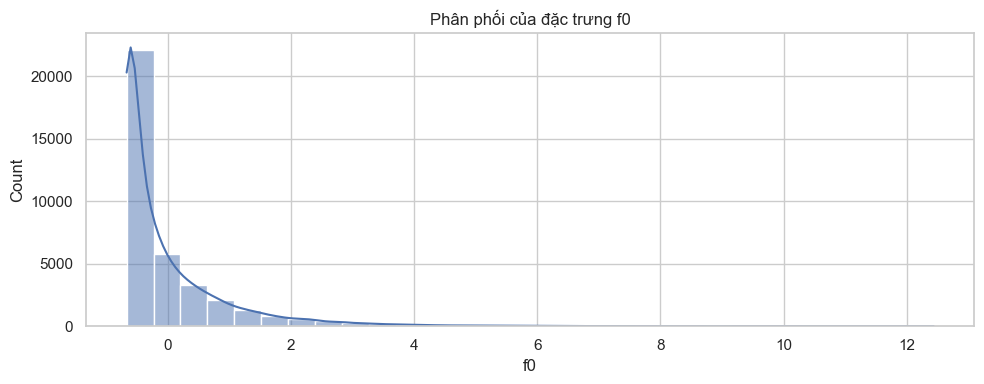

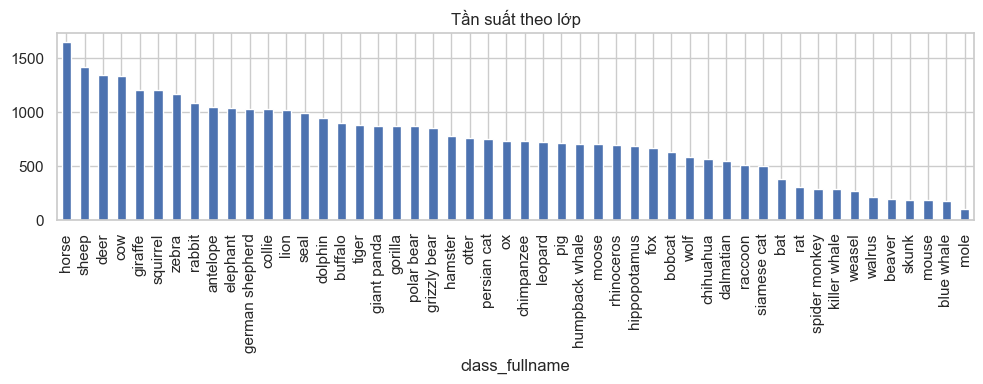

In [5]:
plt.figure(figsize=(10, 4))
sns.histplot(df['f0'], bins=30, kde=True)
plt.title("Phân phối của đặc trưng f0")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
df['class_fullname'].value_counts().plot(kind='bar')
plt.title("Tần suất theo lớp")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

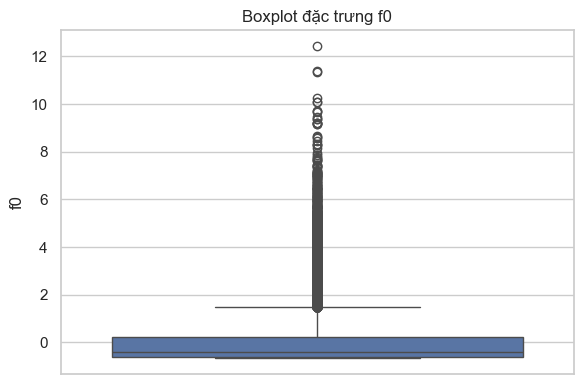

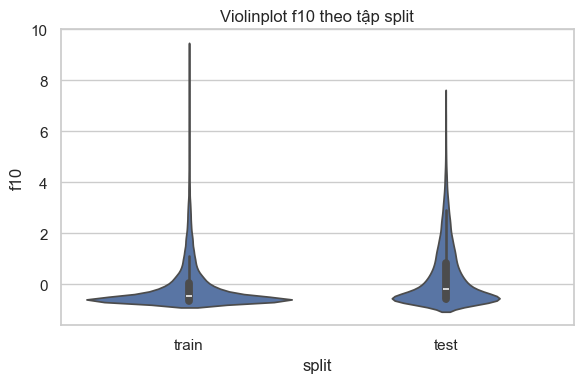

In [6]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='f0')
plt.title("Boxplot đặc trưng f0")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='split', y='f10')
plt.title("Violinplot f10 theo tập split")
plt.tight_layout()
plt.show()


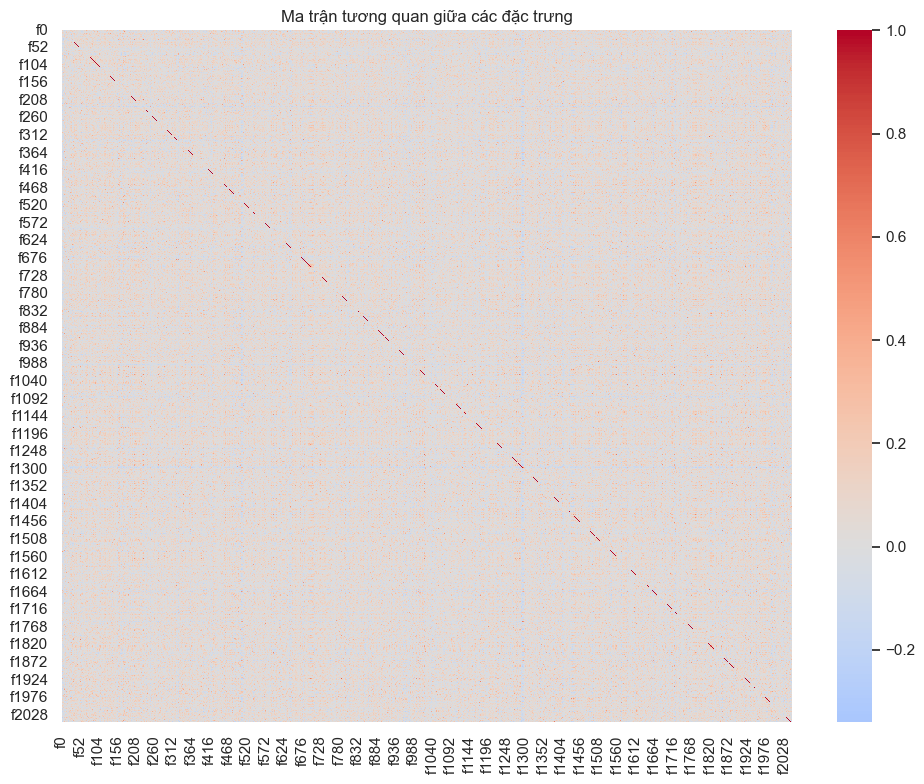

In [7]:
feature_cols = [col for col in df.columns if col.startswith('f') and col[1:].isdigit()]

plt.figure(figsize=(10, 8))
sns.heatmap(df[feature_cols].corr(), cmap='coolwarm', center=0)
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.tight_layout()
plt.show()

Trung bình đặc trưng theo label:


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f2038,f2039,f2040,f2041,f2042,f2043,f2044,f2045,f2046,f2047
label,,,,,,,,,,,,,,,,,,,,,
0,-0.241461,1.114286,-0.242101,-0.617150,1.605709,0.399966,-0.370427,-0.262185,-0.457098,-0.254208,...,-0.362685,-0.436025,0.125292,-0.224761,-0.504454,-0.510997,-0.330992,0.173581,-0.464493,-0.158859
1,-0.143184,0.009485,0.296163,2.540061,-0.515953,-0.130750,0.287957,-0.146974,0.036272,-0.407246,...,-0.260074,0.754100,-0.143356,-0.113038,0.154908,-0.415181,-0.351892,-0.188866,-0.304422,-0.106038
2,-0.417371,0.604427,-0.009377,-0.353971,-0.495864,-0.618441,-0.363948,0.223337,-0.072789,-0.326347,...,0.382979,0.935609,0.306335,0.946140,-0.502071,0.407378,-0.288984,-0.252699,-0.091650,0.348554
3,0.903944,-0.390160,0.710029,1.317708,-0.162613,0.061909,0.664844,-0.267065,-0.174649,0.595797,...,-0.061096,0.722971,-0.121370,0.091689,0.214933,-0.335102,-0.199259,-0.679321,0.054623,-0.016863
4,-0.512869,-0.588390,-0.564361,-0.642908,-0.046645,0.093577,0.919142,0.095473,0.103068,-0.501900,...,1.888444,-0.122025,-0.219856,-0.199601,-0.540519,0.430547,-0.391508,0.576539,0.009365,2.543362


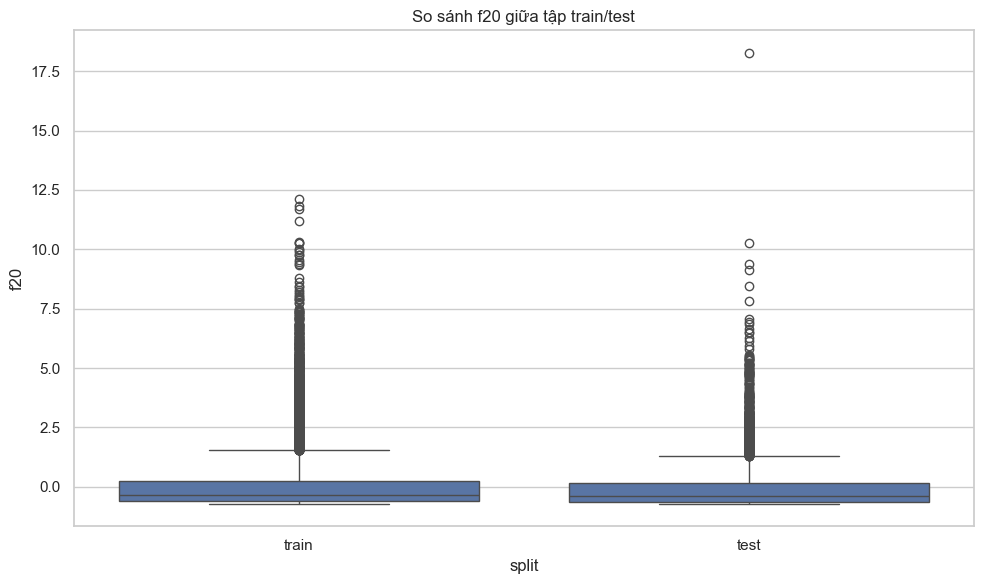

In [8]:
print("Trung bình đặc trưng theo label:")
display(df.groupby('label')[feature_cols].mean().head())

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='split', y='f20')
plt.title("So sánh f20 giữa tập train/test")
plt.tight_layout()
plt.show()

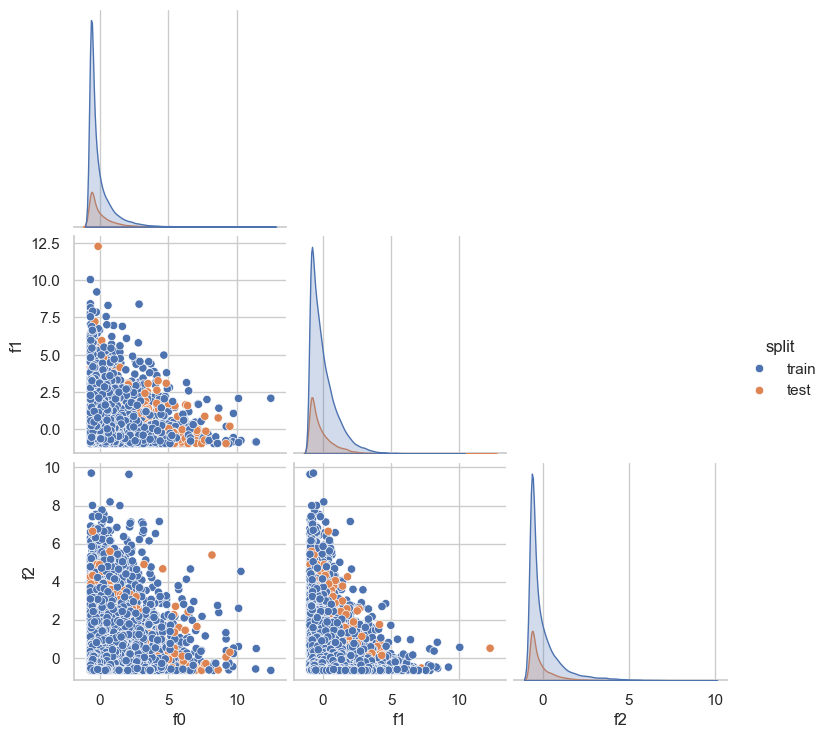

In [9]:
sns.pairplot(df, vars=['f0', 'f1', 'f2'], hue='split', corner=True)
plt.show()

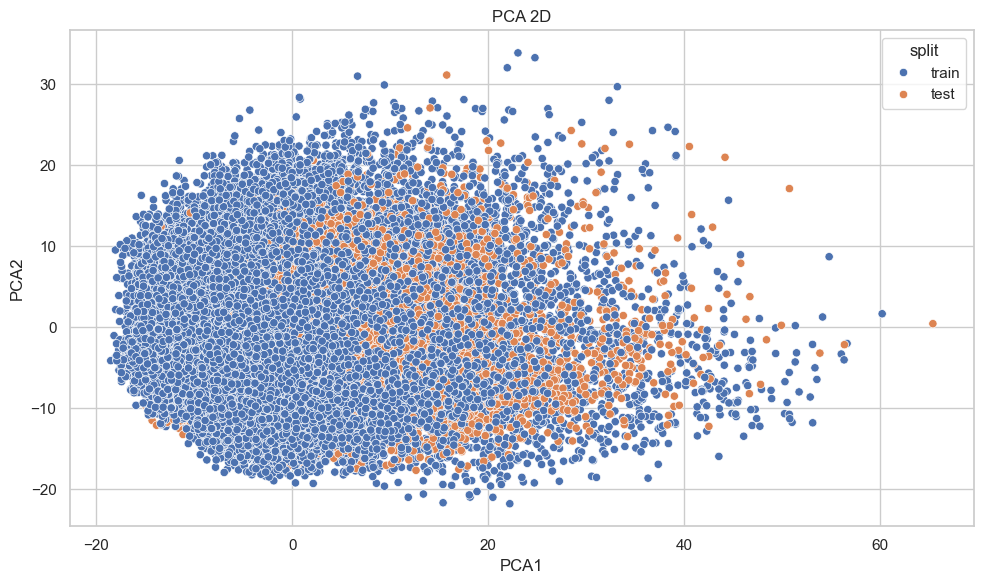

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[feature_cols])
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='split')
plt.title("PCA 2D")
plt.tight_layout()
plt.show()

Xử lí outlier theo IQR

In [11]:
Q1 = df['f0'].quantile(0.25)
Q3 = df['f0'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['f0'] < Q1 - 1.5 * IQR) | (df['f0'] > Q3 + 1.5 * IQR)]
print(f"Số lượng outlier f0 theo IQR: {len(outliers)}")

Số lượng outlier f0 theo IQR: 2818
